## LIBRERÍAS

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## DICCIONARIO DEL DATASET

In [4]:
dicc = pd.read_excel('Diccionario_Banco.xlsx', header=1, names=['Variable', 'Significado'], index_col=False)
dicc

C:\Users\GMA207\AppData\Local\Temp\ipykernel_12872\370641646.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  dicc = pd.read_excel('Diccionario_Banco.xlsx', header=1, names=['Variable', 'Significado'], index_col=False)


,Variable,Significado
0,age,Edad del cliente
1,job,Tipo de empleo del cliente
2,martial status,Estado civil
3,education,Educacion maxima alcanzada por el cliente
4,Credit,Si tiene deuda de crédito o no
5,balance,Promedio de saldo en la cuenta en el anio
6,housing loan,Si tiene seguro de hogar o no
7,Persona loan,Si tiene prestamos o no
8,contact,tipo con contacto del cliente
9,Last Contact Day,Ultimo dia de contacto con el cliente en el mes


## CARGA DEL DATASET

In [6]:
# se carga el dataset en la variable bankdata
bankdata = pd.read_csv('bank_subscription.csv', sep=';')
bankdata.sample(5)

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
2038,34.0,blue-collar,divorced,secondary,no,-294.0,yes,no,unknown,12,may,163.0,2,NaN,0,unknown,0
2158,33.0,NaN,single,NaN,no,1011.0,yes,no,unknown,12,may,NaN,4,-1.0,0,unknown,0
5670,32.0,technician,married,secondary,no,1337.0,NaN,no,unknown,26,may,368.0,6,-1.0,0,unknown,0
32337,30.0,admin.,NaN,tertiary,no,26.0,yes,no,cellular,16,apr,62.0,1,NaN,1,failure,0
7422,39.0,management,NaN,secondary,no,835.0,NaN,no,unknown,29,may,587.0,4,-1.0,0,unknown,0


In [7]:
# se visualizan las dimensiones del dataset
print(f'Cantidad de filas: {bankdata.shape[0]}')
print(f'Cantidad de columnas: {bankdata.shape[1]}')

Cantidad de filas: 45211
Cantidad de columnas: 17


## LIMPIEZA

In [9]:
# nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.
eda_df=pd.concat([bankdata.isnull().sum(), np.round(bankdata.isnull().mean()*100,0),bankdata.dtypes], axis=1)
eda_df.columns=["Nulos","[%]","Dtype"]
eda_df

,Nulos,[%],Dtype
Age,4973,11.0,float64
Job,4973,11.0,object
Marital Status,4973,11.0,object
Education,4973,11.0,object
Credit,4973,11.0,object
Balance (euros),4973,11.0,float64
Housing Loan,7686,17.0,object
Personal Loan,7686,17.0,object
Contact,0,0.0,object
Last Contact Day,0,0.0,int64


En el dataset podemos visualizar que hay variables que contienen desde un 11% hasta un 17% de datos nulos, con lo cual se deberá analizar de que forma se manejaran estos valores nulos. Antes de ello, se hará un control sobre las variables categóricas y numéricas en busca de lo siguiente:
- **Categóricas:** Verificar la existencia de clases dentro de la variable que tengan nombres distintos y que se refieran a lo mismo.
- **Numéricas:** Verificar que no haya valores incoherentes para el significado de la variable numérica.

### MANEJO DE VARIABLES CATEGÓRICAS

In [12]:
# se eliminan las filas con nulos
bankdata_sin_null = bankdata.dropna()
# solo mantenemos las variables categoricas
bankdata_categoricas = bankdata_sin_null.select_dtypes(include=['object'])

print('CLASES POR VARIABLE \n')
# se visualizan las clases unicas de cada variable categorica
for columna in bankdata_categoricas.columns:
    categorias_unicas = bankdata_categoricas[str(columna)].unique()
    print(f'categorias de {columna.upper()} -> {categorias_unicas} \n')

CLASES POR VARIABLE 

categorias de JOB -> ['management' 'technician' 'services' 'retired' 'admin.' 'blue-collar'
 'housemaid' 'entrepreneur' 'student' 'self-employed' 'unknown'
 'unemployed'] 

categorias de MARITAL STATUS -> ['single' 'married' 'divorced'] 

categorias de EDUCATION -> ['tertiary' 'secondary' 'primary' 'unknown'] 

categorias de CREDIT -> ['no' 'yes'] 

categorias de HOUSING LOAN -> ['yes' 'no'] 

categorias de PERSONAL LOAN -> ['yes' 'no'] 

categorias de CONTACT -> ['unknown' 'cellular' 'telephone'] 

categorias de LAST CONTACT MONTH -> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

categorias de POUTCOME -> ['unknown' 'other' 'failure' 'success'] 



Todas las variables tienen clases únicas con significados diferentes. No hace falta hacer ninguna modificación en ellas.

### MANEJO DE VARIABLES NUMÉRICAS

In [15]:
# Visualizacion de metricas principales de todas las variables numericas
bankdata_sin_null.describe()

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
count,10630.000000,10630.000000,10630.000000,10630.000000,10630.000000,10630.000000,10630.000000,10630.000000
mean,41.089276,1357.860960,15.696331,256.620978,2.780245,40.912888,0.563311,0.112982
std,10.652741,3028.454521,8.328843,259.270058,3.113898,100.954838,1.861234,0.316586
min,18.000000,-2604.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,446.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1454.000000,21.000000,316.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,81204.000000,31.000000,4918.000000,55.000000,828.000000,51.000000,1.000000


A priori la única variable que presenta valores incoherentes es Pdays. El valor -1, que indica que no hubo contacto previo con el cliente, resulta ser un valor antiintuitivo. Se decidió reemplazar dichos valores por el valor máximo de la variable (828), ya que es un valor más semejante a que nunca haya habido un contacto con el cliente.

Text(0, 0.5, 'Cantidad')

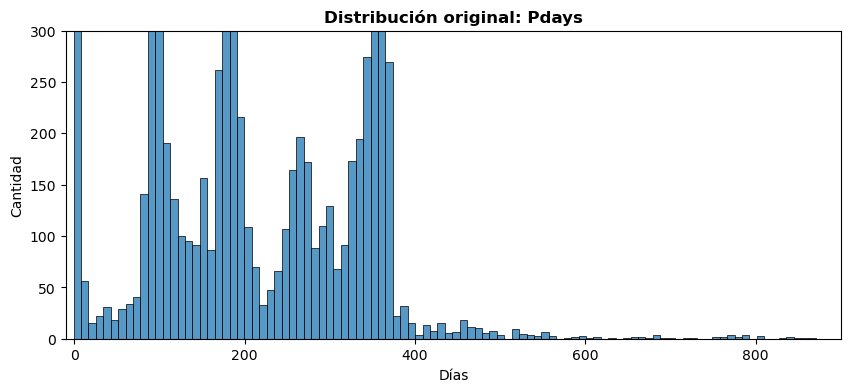

In [17]:
# visualizacion de un histograma de Pdays previo a hacer los cambios
plt.figure(figsize=(10, 4))
sns.histplot(data=bankdata, x='Pdays', bins=100)
plt.xlim(-10,900)
plt.ylim(0,300)
plt.title("Distribución original: Pdays",fontweight='bold')
plt.xlabel("Días")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

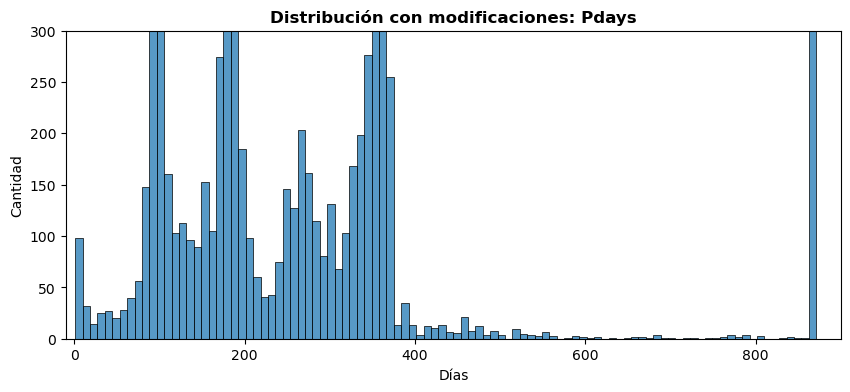

In [18]:
# reemplazo de Pdays = 1 con el valor maximo de Pdays
mask_pdays_1 = bankdata['Pdays'] == -1
bankdata.loc[mask_pdays_1, 'Pdays'] = bankdata['Pdays'].max()

# visualizacion de un histograma de Pdays luego de hacer los cambios
plt.figure(figsize=(10, 4))
sns.histplot(data=bankdata, x='Pdays', bins=100)
plt.xlim(-10,900)
plt.ylim(0,300)
plt.title("Distribución con modificaciones: Pdays",fontweight='bold')
plt.xlabel("Días")
plt.ylabel("Cantidad")

### MANEJO DE VALORES NULOS

Como se visualizó antreriormente las variables poseen entre un 11% y 17% de valores nulos, con lo cual en ningun caso se eliminará la variable. Para la imputación de los valores nulos se siguieron los siguientes dos criterios en función de si la variable es numérica o categórica:
- **Categóricas:** Se comparó cada variable categórica contra otra variable categórica o numérica discretizada (con deciles) para poder reemplazar los nulos con la moda resultante de la comparación.
- **Numéricas:** En función de la distribución de los datos de cada variable se decidirá si es conveniente reemplazar los nulos con la media, mediana o con algún otro valor en específico de la propia variable numérica.

Particularmente, las imputaciones definidas, y que se realizarán a continuación, para los registros nulos de cada variable son las siguientes:
- **Pdays** -> con valor max Pdays
- **Last Contact Duration** -> con mediana Last Contact Duration
- **Balance (euros)** -> con mediana Balance (euros)
- **Job** -> con moda Job por Decil Balance (euros)
- **Education** -> con moda Education por Job
- **Age** -> con mediana Age por Job
- **Marital Status** -> con moda Marital Status por Decil Age
- **Housing Loan** -> con moda Housing Loan por Decil Age
- **Credit** -> con moda Credit
- **Personal Loan** -> con moda Personal Loan

In [21]:
# se crea un dataframe para aplicar las transformaciones sin afectar el original
bankdata_clean = bankdata.copy()

#### Variable numérica: Pdays

Anteriormente, se visualizó la distribución de Pdays luego de reemplazar los valores -1 por el máximo de Pdays. Se podía observar que la mayoría de usuarios no habían sido contactados previamente. A continuación validaremos esto:

In [24]:
# cantidad de usuarios con Pdays = maximo de Pdays
cant_pdays_max = bankdata.loc[bankdata['Pdays'] == bankdata['Pdays'].max(), 'Pdays'].count()
# cantidad de usuarios con Pdays != maximo de Pdays y no nulo
cant_pdays_no_max = bankdata.loc[(bankdata['Pdays'] != bankdata['Pdays'].max()) & (bankdata['Pdays'].notnull()), 'Pdays'].count()
# proporcion de valores Pdays = maximo de Pdays sobre el total de registros no nulos de Pdays
prop_pdays_max = cant_pdays_max / (cant_pdays_no_max + cant_pdays_max) * 100


print(f'Cantidad de Pdays = max: {cant_pdays_max}')
print(f'Cantidad de Pdays != max y no nulo: {cant_pdays_no_max}')
print(f'Proporción de Pdays = max sobre el total no nulo: {prop_pdays_max:.2f}%')

Cantidad de Pdays = max: 30686
Cantidad de Pdays != max y no nulo: 6839
Proporción de Pdays = max sobre el total no nulo: 81.77%


Casi el 82% de los clientes no fueron contactados previamente. Por ende, se reemplazarán los valores nulos de Pdays por el valor máximo de Pdays que según lo antes analizado querra decir que nunca fueron contactados.

True


Text(0, 0.5, 'Cantidad')

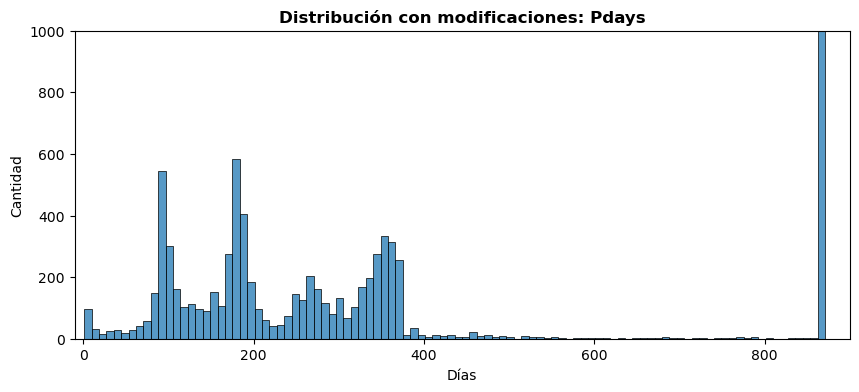

In [26]:
# se reemplzan los valores nulos de Pdays con el máximo de Pdays
bankdata_clean['Pdays'] = bankdata_clean['Pdays'].fillna(bankdata['Pdays'].max())

# verificacion de Balance (euros) sin nulls
print(bankdata_clean['Pdays'].isnull().sum() == 0)

# visualizacion de la distribucion de Pdays luego de los cambios
plt.figure(figsize=(10, 4))
sns.histplot(data=bankdata_clean, x='Pdays', bins=100)
plt.xlim(-10,900)
plt.ylim(0,1000)
plt.title("Distribución con modificaciones: Pdays",fontweight='bold')
plt.xlabel("Días")
plt.ylabel("Cantidad")

#### Variable numérica: Last Contact Duration

Text(0, 0.5, 'Cantidad')

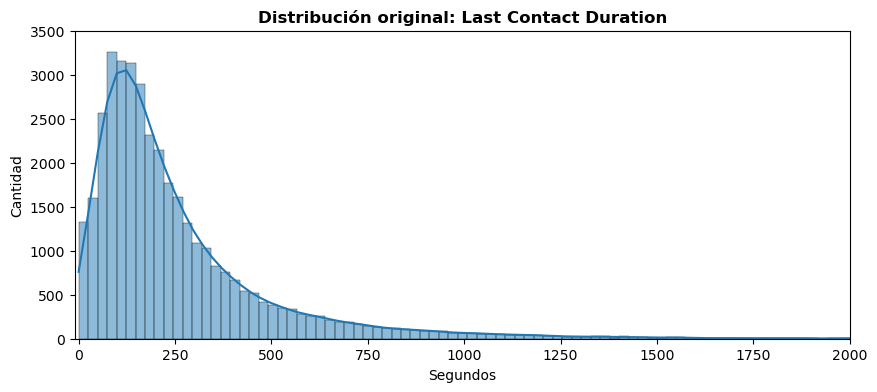

In [28]:
# visualizacion de la distribucion de Last Contact Duration
plt.figure(figsize=(10, 4))
sns.histplot(data=bankdata, x='Last Contact Duration', bins=200, kde=True)
plt.xlim(-10,2000)
plt.ylim(0,3500)
plt.title("Distribución original: Last Contact Duration",fontweight='bold')
plt.xlabel("Segundos")
plt.ylabel("Cantidad")

Dado que la distribución de Last Contact Duration es similar a una normal con sesgo positivo, se reemplazarán sus valores nulos utilizando la mediana de la propia variable.

In [30]:
# se imputan la mediana de Last Contact Duration en sus registros nulos.
bankdata_clean['Last Contact Duration'] = bankdata_clean['Last Contact Duration'].fillna(bankdata['Last Contact Duration'].median())

# verificacion de Last Contact Duration sin nulls
bankdata_clean['Last Contact Duration'].isnull().sum() == 0

True

#### Variable numérica: Balance (euros)

Text(0, 0.5, 'Cantidad')

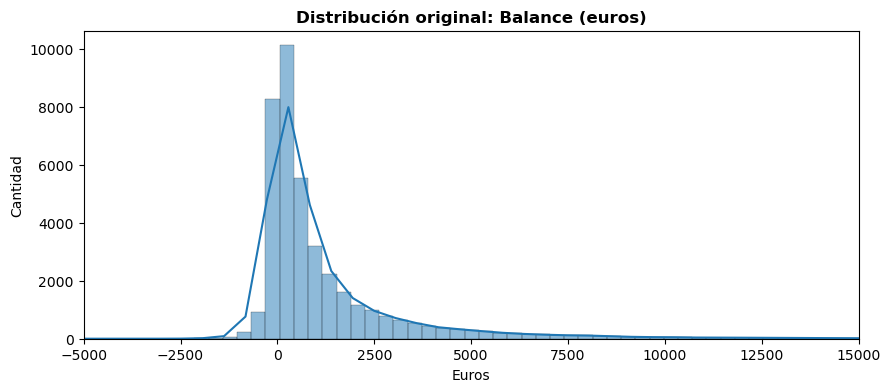

In [32]:
# visualizacion de la distribución de Balance (euros)
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=bankdata_clean, x= 'Balance (euros)', bins=300, kde=True)
plt.xlim(-5000,15000)
plt.title("Distribución original: Balance (euros)",fontweight='bold')
plt.xlabel("Euros")
plt.ylabel("Cantidad")

Dado que la distribución de Balance (euros) es similar a una normal con sesgo positivo, se reemplazaran sus valores nulos utilizando la mediana de la propia variable.

In [34]:
# se imputan la mediana de Balance (euros) en sus registros nulos.
bankdata_clean['Balance (euros)'] = bankdata_clean['Balance (euros)'].fillna(bankdata['Balance (euros)'].median())

# verificación de Balance (euros) sin nulls
bankdata_clean['Balance (euros)'].isnull().sum() == 0

True

#### Variable categórica: Job

Text(0, 0.5, 'Cantidad')

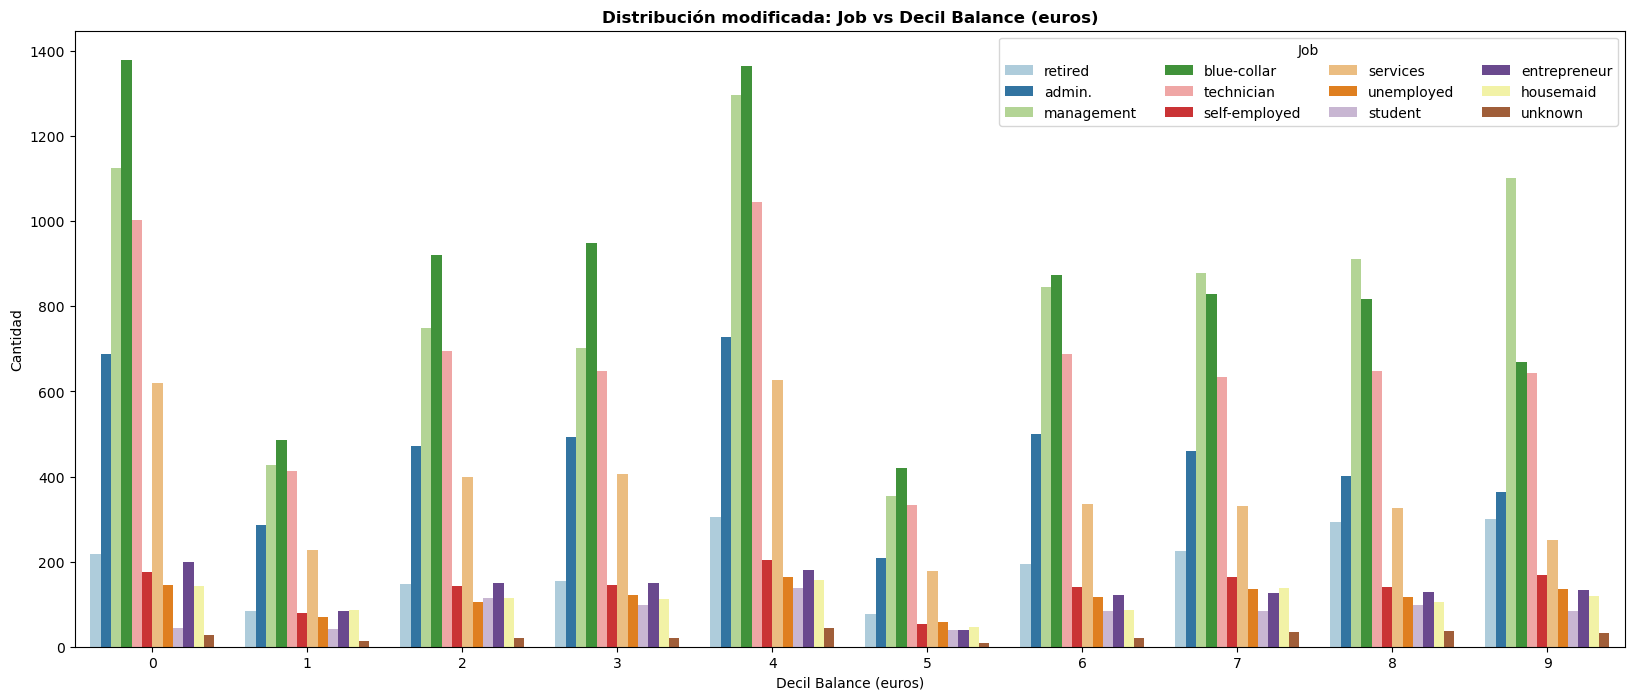

In [36]:
# se crea una variable que contiene el número de decil de Balance (euros) para cada usuario
bankdata_clean['Decil Balance (euros)'] = pd.qcut(bankdata_clean['Balance (euros)'], 10, labels=False)

# se visualiza el Job vs Decil Balance (euros)
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=bankdata_clean, x='Decil Balance (euros)', hue='Job', palette='Paired')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=4, title='Job')
plt.title("Distribución modificada: Job vs Decil Balance (euros)",fontweight='bold')
plt.xlabel("Decil Balance (euros)")
plt.ylabel("Cantidad")

En los deciles 0 a 6 de Balance (euros) el Job predominante es blue-collar, mientras que en el resto de deciles, el Job más frecuente es management. Se imputarán los Job = null siguiendo dicho criterio.

In [38]:
# Se imputan los Job = null con la moda de Job para cada Decil Balance (euros)
bankdata_clean['Job'] = bankdata_clean['Job'].fillna(bankdata_clean.groupby('Decil Balance (euros)')['Job'].transform(lambda x: x.mode()[0]))

# Verificación de Job sin nulls
bankdata_clean['Job'].isnull().sum() == 0

True

#### Variable categórica: Education

Text(0, 0.5, 'Cantidad')

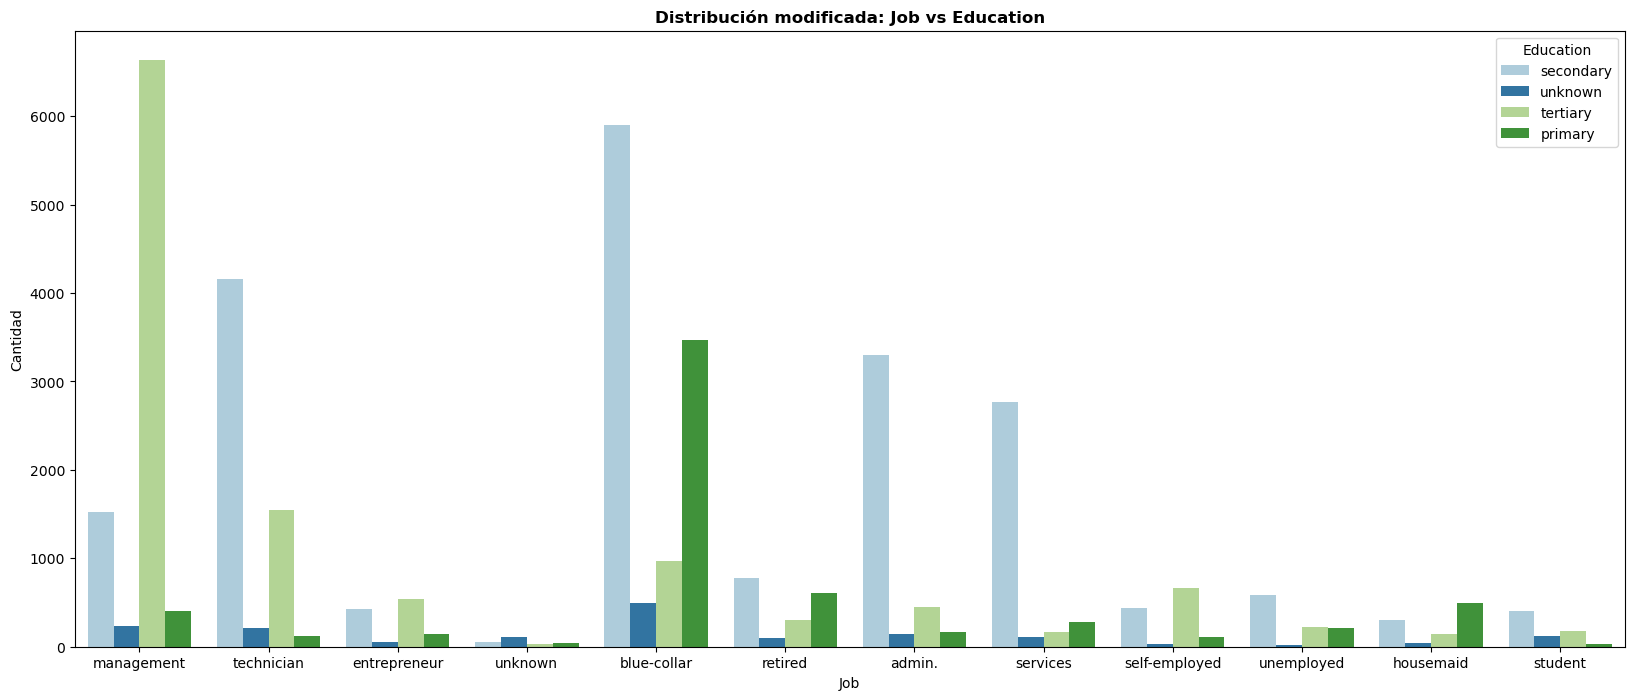

In [40]:
# se visualizan las variables Job vs Education 
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=bankdata_clean, x='Job', hue='Education', palette='Paired')
plt.title("Distribución modificada: Job vs Education",fontweight='bold')
plt.xlabel("Job")
plt.ylabel("Cantidad")

Para cada Job existe un valor de Education más frecuente. Se imputarán los valores nulos de Education siguiendo dicho criterio.

In [42]:
# Se imputan los Job = null con la moda de Job para cada Decil Balance (euros)
bankdata_clean['Education'] = bankdata_clean['Education'].fillna(bankdata_clean.groupby('Job')['Education'].transform(lambda x: x.mode()[0]))

# Verificación de Job sin nulls
bankdata_clean['Education'].isnull().sum() == 0

True

#### Variable numérica: Age

Text(0, 0.5, 'Cantidad')

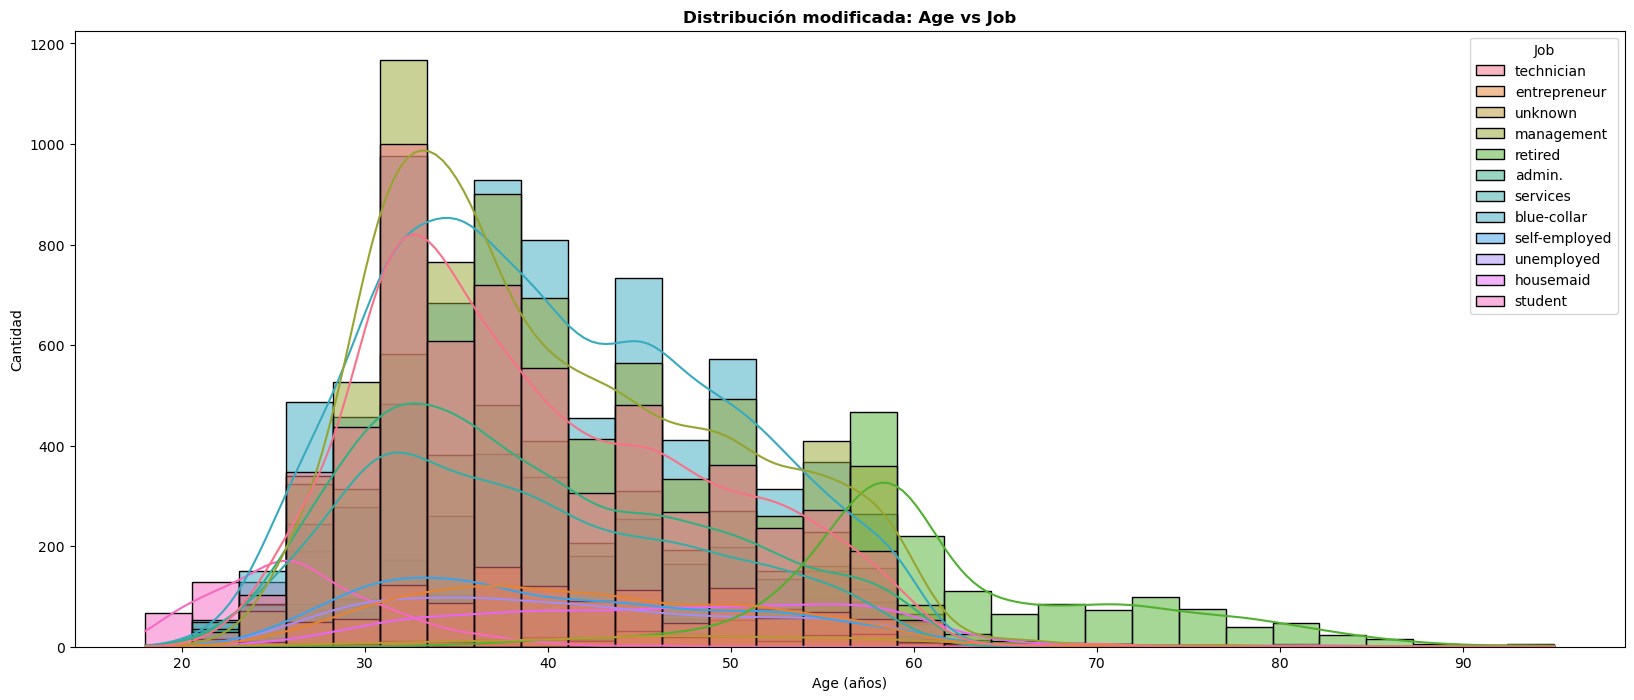

In [44]:
# visualizacion de la distribución de Age vs Job
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=bankdata, x='Age', bins=30, kde=True, hue='Job')
plt.title("Distribución modificada: Age vs Job",fontweight='bold')
plt.xlabel("Age (años)")
plt.ylabel("Cantidad")

La mediana de Age es distinta para cada Job. La principal diferencia se puede observar en los Job "student" y "retired". Lo comprobamos a continuación:

In [46]:
bankdata_clean.groupby('Job')['Age'].median().round(0)

Job
admin.           37.0
blue-collar      39.0
entrepreneur     41.0
housemaid        47.0
management       39.0
retired          59.0
self-employed    39.0
services         37.0
student          26.0
technician       37.0
unemployed       40.0
unknown          47.0
Name: Age, dtype: float64

Se reemplazarán los registros Age = null con la mediana de Age por Job.

In [48]:
# se imputan los Age = null con la mediana de Age por Job
bankdata_clean['Age'] = bankdata_clean['Age'].fillna(bankdata_clean.groupby('Job')['Age'].transform('median'))

# Verificación de Age sin nulls
bankdata_clean.Age.isnull().sum() == 0

True

#### Variable categórica: Marital Status

Text(0, 0.5, 'Cantidad')

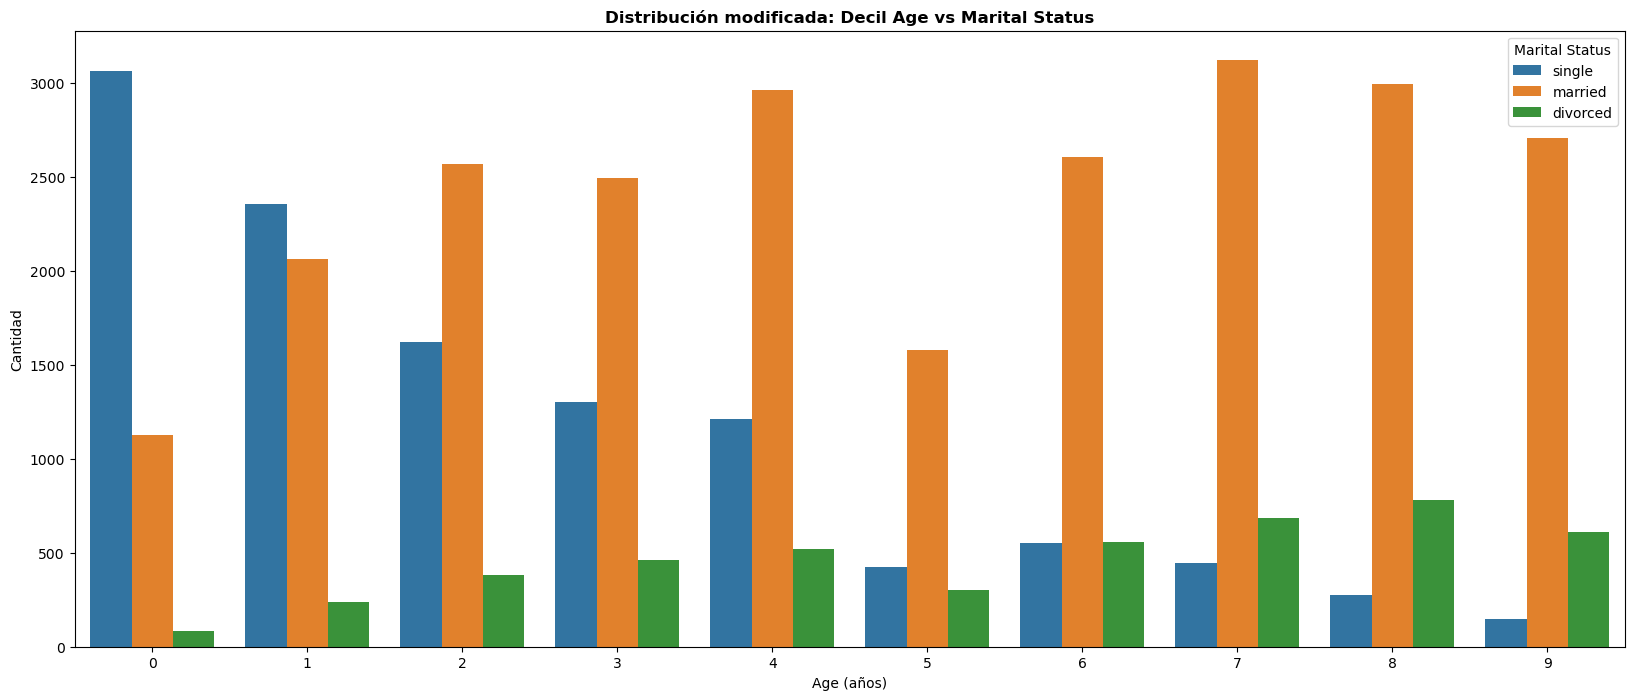

In [50]:
# se crea una variable que contiene el numero de decil de Age para cada usuario
bankdata_clean['Decil Age'] = pd.qcut(bankdata_clean['Age'], 10, labels=False)

# Se visualiza el Marital Status vs Decil Age
plt.figure(figsize=(20, 8))
sns.countplot(data=bankdata_clean, x='Decil Age', hue='Marital Status')
plt.title("Distribución modificada: Decil Age vs Marital Status",fontweight='bold')
plt.xlabel("Age (años)")
plt.ylabel("Cantidad")

En los deciles 0 y 1 de Age el Marital Status predominante es Single, mientras que en el resto de deciles, el Marital Status más frecuente con diferencia es Married. Se imputarán los Marital Status = null siguiendo dicho criterio.

In [52]:
# se imputan los Marital Status = null con la moda de Marital Status para cada Decil Age
bankdata_clean['Marital Status'] = bankdata_clean['Marital Status'].fillna(bankdata_clean.groupby('Decil Age')['Marital Status'].transform(lambda x: x.mode()[0]))

# verificacion de Marital Status sin nulls
bankdata_clean['Marital Status'].isnull().sum() == 0

True

#### Variable categórica: Housing Loan

Text(0, 0.5, 'Cantidad')

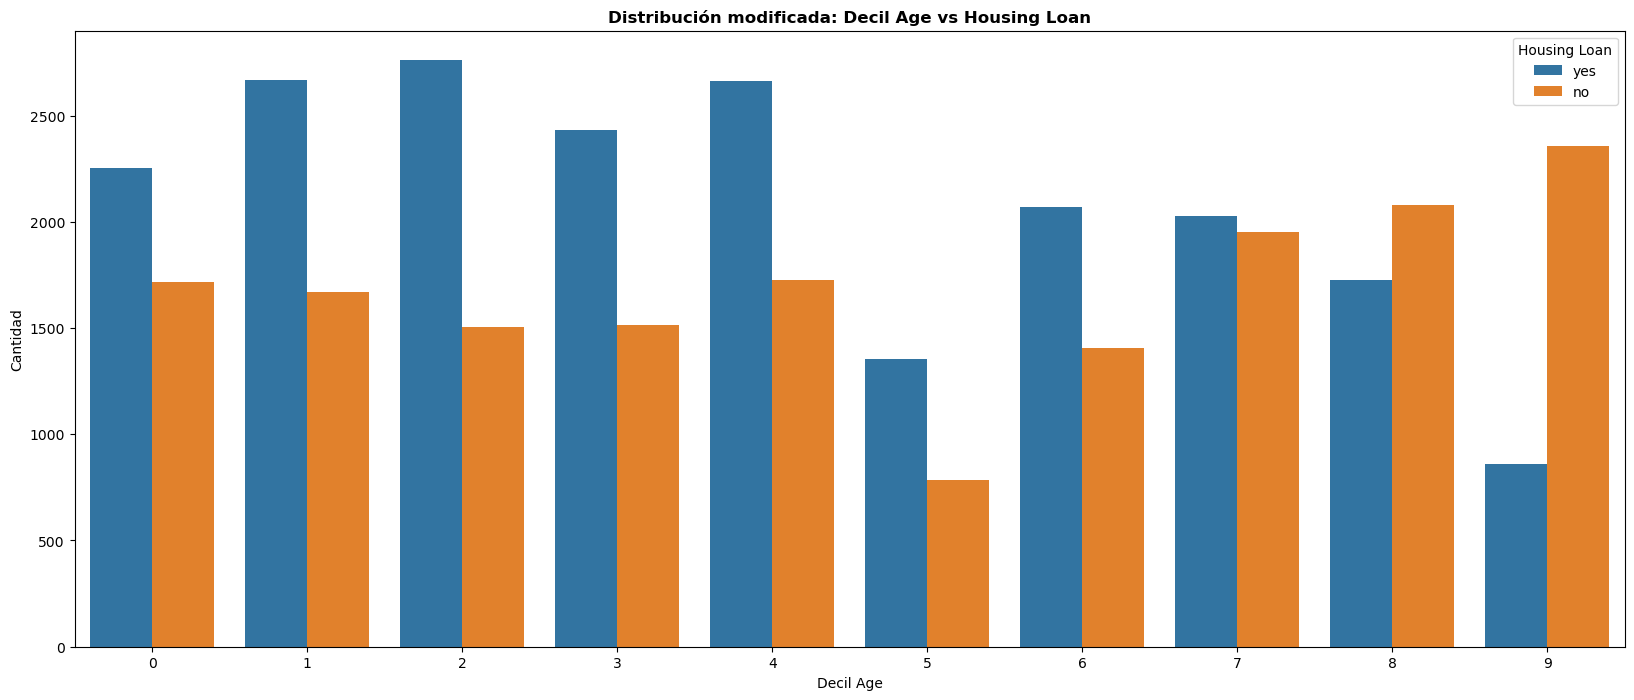

In [54]:
# Se visualiza la distribución de Personal Loan
plt.figure(figsize=(20, 8))
sns.countplot(data=bankdata_clean, x='Decil Age', hue='Housing Loan')
plt.title("Distribución modificada: Decil Age vs Housing Loan",fontweight='bold')
plt.xlabel("Decil Age")
plt.ylabel("Cantidad")

En los deciles 0 a 7 de Age el valor predominante de Housing Loan es yes, mientras que en el resto de deciles, el Housing Loan más frecuente es no. Se imputarán los Housing Loan = null siguiendo dicho criterio.

In [56]:
# se imputan los Housing Loan = null con la moda de Housing Loan para cada Decil Age
bankdata_clean['Housing Loan'] = bankdata_clean['Housing Loan'].fillna(bankdata_clean.groupby('Decil Age')['Housing Loan'].transform(lambda x: x.mode()[0]))

# Verificación de Housing Loan sin nulls
bankdata_clean['Housing Loan'].isnull().sum() == 0

True

#### Variable categórica: Credit

Proporción de usuarios con Credit = no: 98.19%


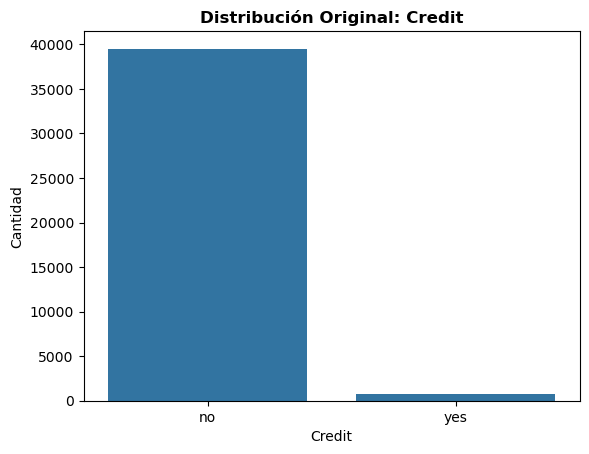

In [58]:
# se visualiza la distribución de Credit
sns.countplot(data=bankdata, x='Credit')
plt.title("Distribución Original: Credit",fontweight='bold')
plt.xlabel("Credit")
plt.ylabel("Cantidad")

# Proporción de usuarios con credit = no
prop_no_credit = bankdata.loc[bankdata['Credit'] == 'no', 'Credit'].count() / bankdata['Credit'].count() * 100
print(f'Proporción de usuarios con Credit = no: {prop_no_credit:.2f}%')

El 98% de los usuarios tienen Credit = no, por lo cual se reemplazarán los valores nulos de Credit con un valor de no.

In [60]:
# imputacion de los registros Credit = null con el valor no
bankdata_clean['Credit'] = bankdata_clean['Credit'].fillna('no')

# verificacion de Credit sin nulls
bankdata_clean['Credit'].isnull().sum() == 0

True

#### Variable categórica: Personal Loan

Proporción de usuarios con Credit = no: 84.04%


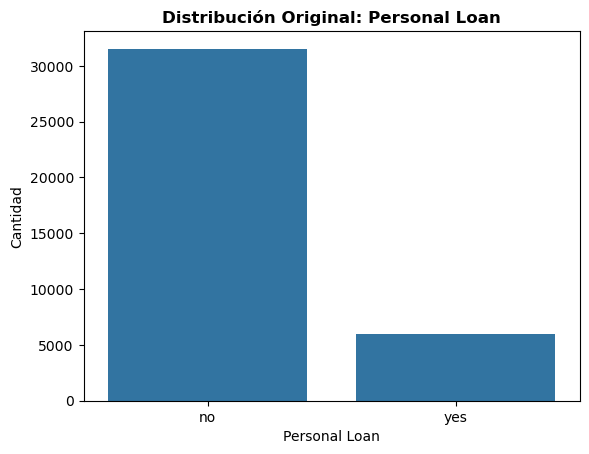

In [62]:
# Se visualiza la distribucion de Personal Loan
sns.countplot(data=bankdata, x='Personal Loan')
plt.title("Distribución Original: Personal Loan",fontweight='bold')
plt.xlabel("Personal Loan")
plt.ylabel("Cantidad")

# Proporción de usuarios con Personal Loan = no
prop_no_personal_loan = bankdata.loc[bankdata['Personal Loan'] == 'no', 'Personal Loan'].count() / bankdata['Personal Loan'].count() * 100
print(f'Proporción de usuarios con Credit = no: {prop_no_personal_loan:.2f}%')

El 84% de los usuarios tienen Personal Loan = no, por lo cual se reemplazarán los valores nulos de Personal Loan con un valor de no.

In [64]:
# imputación de los registros Perosnal Loan = null con el valor no
bankdata_clean['Personal Loan'] = bankdata_clean['Personal Loan'].fillna('no')

# verificación de Personal Loan sin nulls
bankdata_clean['Personal Loan'].isnull().sum() == 0

True

#### Verificación final de nulos

In [66]:
bankdata_clean.isnull().sum()

Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Contact                  0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
Subscription             0
Decil Balance (euros)    0
Decil Age                0
dtype: int64

In [67]:
# se eliminan las columnas creadas para imputar los nulos
bankdata_clean = bankdata_clean.drop(['Decil Balance (euros)', 'Decil Age'], axis=1)

### Función con el preprocesamiento

Se define una función, que contiene todo el preprocesamiento efectuado sobre el dataset. Esta luego se utilizará en un pipeline para realizar el preprocesamiento de datos previo a la aplicación de los modelos de Machine Learning.

In [70]:
def preprocesamiento_datos(bankdata):
    # Manejo de variables numericas
    mask_pdays_1 = bankdata['Pdays'] == -1
    bankdata.loc[mask_pdays_1, 'Pdays'] = bankdata['Pdays'].max()
    
    bankdata_clean = bankdata.copy() # df con modificaciones
    
    # Imputacion de nulos
    
    # Pdays
    bankdata_clean['Pdays'] = bankdata_clean['Pdays'].fillna(bankdata['Pdays'].max())
    # Last Contact Duration
    bankdata_clean['Last Contact Duration'] = bankdata_clean['Last Contact Duration'].fillna(bankdata['Last Contact Duration'].median())
    # Balance (euros)
    bankdata_clean['Balance (euros)'] = bankdata_clean['Balance (euros)'].fillna(bankdata['Balance (euros)'].median())
    # Job
    bankdata_clean['Decil Balance (euros)'] = pd.qcut(bankdata_clean['Balance (euros)'], 10, labels=False)
    bankdata_clean['Job'] = bankdata_clean['Job'].fillna(bankdata_clean.groupby('Decil Balance (euros)')['Job'].transform(lambda x: x.mode()[0]))
    # Education
    bankdata_clean['Education'] = bankdata_clean['Education'].fillna(bankdata_clean.groupby('Job')['Education'].transform(lambda x: x.mode()[0]))
    # Age
    bankdata_clean['Age'] = bankdata_clean['Age'].fillna(bankdata_clean.groupby('Job')['Age'].transform('median'))
    # Marital Status
    bankdata_clean['Decil Age'] = pd.qcut(bankdata_clean['Age'], 10, labels=False)
    bankdata_clean['Marital Status'] = bankdata_clean['Marital Status'].fillna(bankdata_clean.groupby('Decil Age')['Marital Status'].transform(lambda x: x.mode()[0]))
    # Housing Loan
    bankdata_clean['Housing Loan'] = bankdata_clean['Housing Loan'].fillna(bankdata_clean.groupby('Decil Age')['Housing Loan'].transform(lambda x: x.mode()[0]))
    # Credit
    bankdata_clean['Credit'] = bankdata_clean['Credit'].fillna('no')
    # Personal Loan
    bankdata_clean['Personal Loan'] = bankdata_clean['Personal Loan'].fillna('no')

    # eliminacion de columnas auxiliares
    bankdata_clean = bankdata_clean.drop(['Decil Balance (euros)', 'Decil Age'], axis=1)
    
    return bankdata_clean

# se cargo nuevamente el datasate original
bankdata_original = pd.read_csv('bank_subscription.csv', sep=';')

# se aplica la funcion creada sobre el dataset original
bankdata_clean_2 = preprocesamiento_datos(bankdata_original)

# se verifica que el resultado de la funcion sea el mismo que todo el preprocesamiento efectuado
print(bankdata_clean.equals(bankdata_clean_2))

True


## ANÁLISIS EXPLORATORIO DE DATOS (EDA)

 Una vez realizada la limpieza del dataset original, se procederá a realizar un análisis exploratorio para identificar correlaciones entre variables, distribuciones y posibles outliers.

### Matirz de correlación lineal

Text(95.7222222222222, 0.5, 'Features')

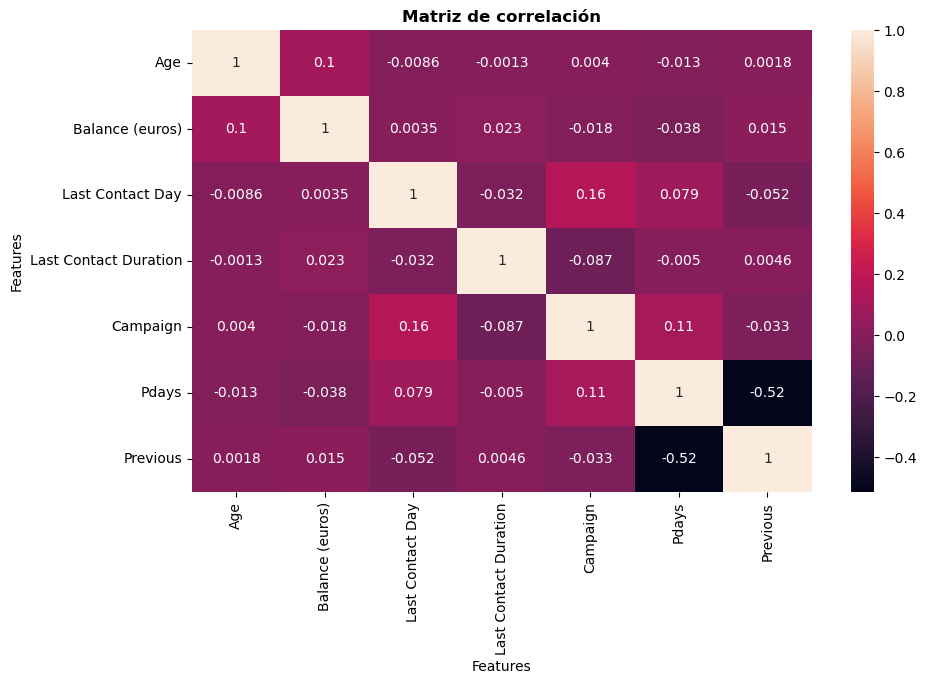

In [158]:
# se construye y visualiza la matriz de correlación con todas las variables númericas excepto subscription
bankdata_clean_sin_subscription = bankdata.drop(columns=['Subscription'])
matriz_correlacion = bankdata_clean_sin_subscription.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True)
plt.title("Matriz de correlación",fontweight='bold')
plt.xlabel("Features")
plt.ylabel("Features")

Se puede observar que la correlación lineal más fuerte se encuentra entre las variables **entre Pdays y Previuos**. Estas tienen una correlación negativa de 0.52, lo cual quiere decir que dentro del dataset cuantos más contactos previos a una campaña tuvo un cliente, menos días pasaron desde su último contacto.

### Correlación entre variables numéricas y Subscription

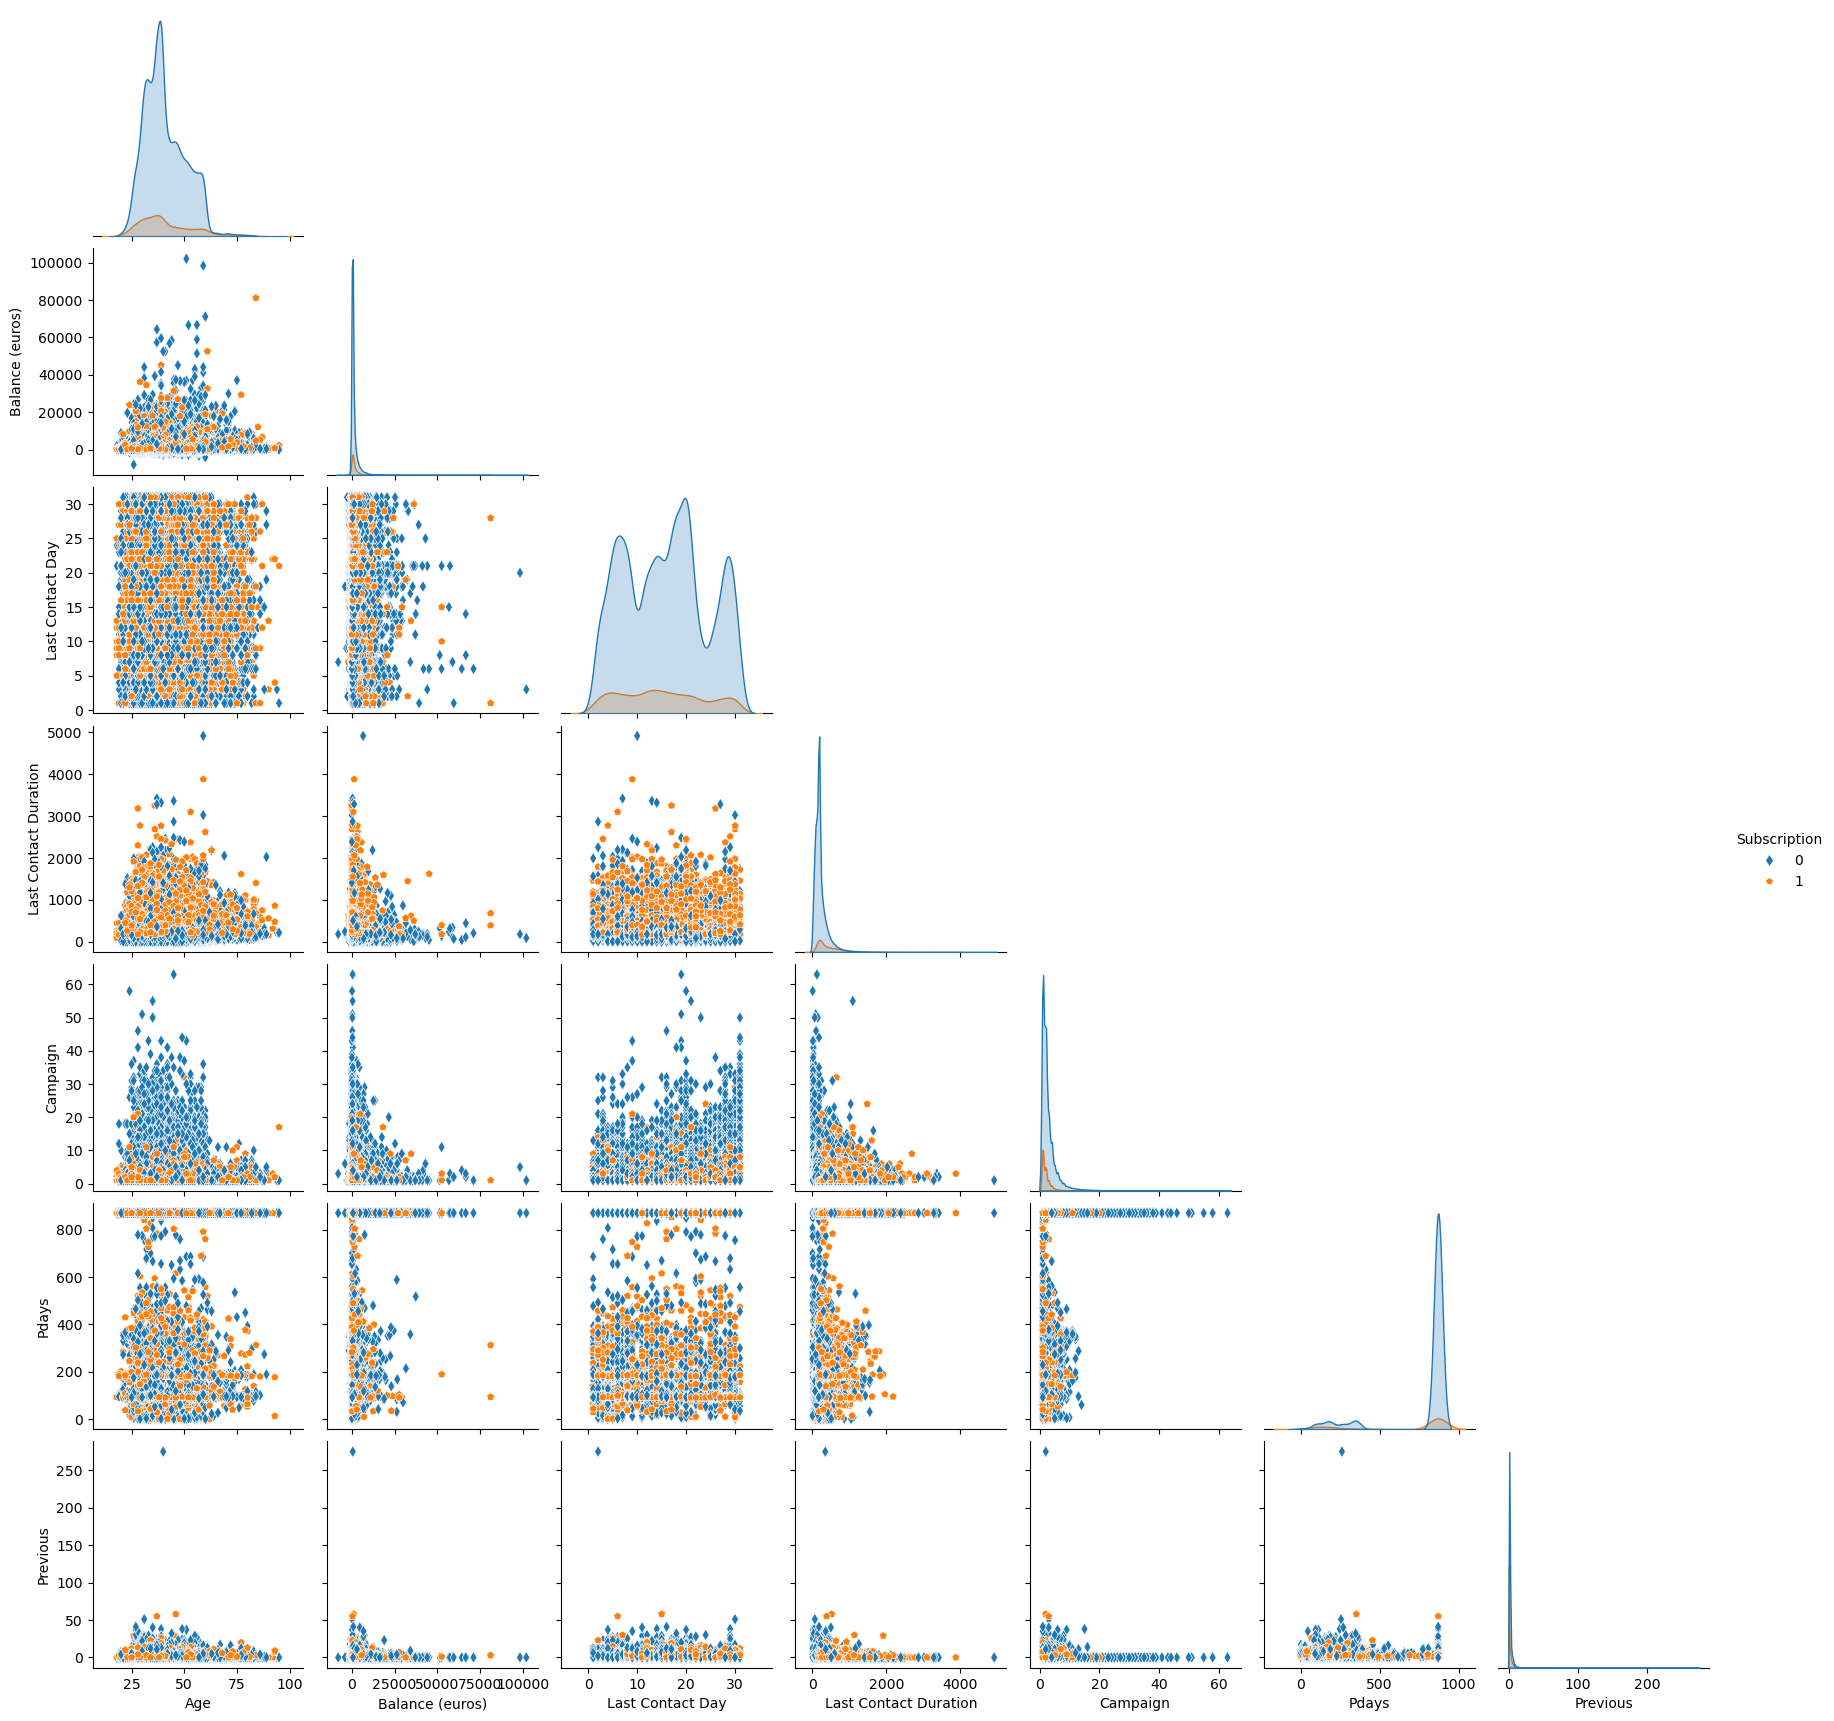

In [78]:
sns.pairplot(bankdata_clean,hue='Subscription', diag_kind = "kde", markers = ['d', 'p'], corner=True)

**Observaciones:**
En la diagonal del gráfico, se observa que en cada variable, la condicion de subscripción o no subscripción respeta la misma distribución por lo que ninguna por si sola es relevante para explicar el comportamiento de los datos.
En los graficos de feature vs feature numéricas se observan 2 que muestran cierta separación en la densidad de los usuarios subscriptos contra los que no están subscriptos.Estos se presentan en detalle a continuación:

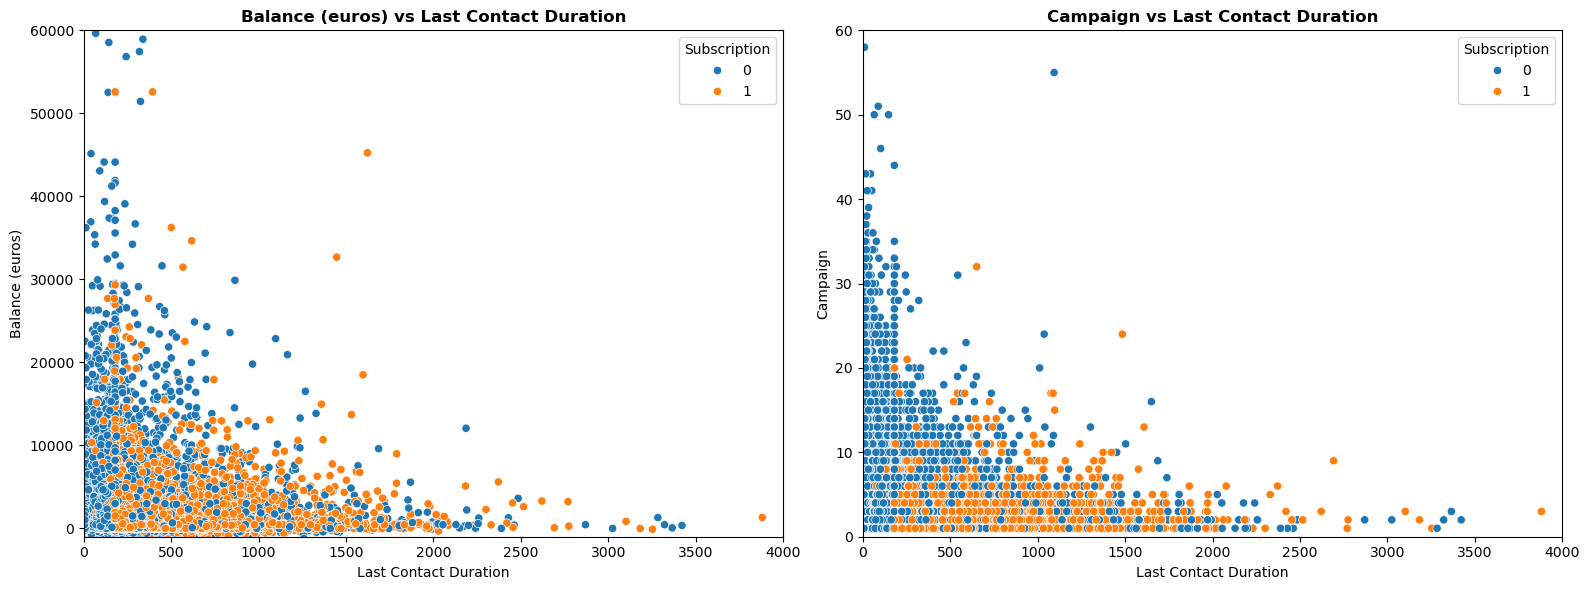

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

sns.scatterplot(bankdata_clean,
            hue='Subscription',
            x='Last Contact Duration',y='Balance (euros)',
            palette='tab10',
            ax=axes[0]
               )
axes[0].set_xlim(0, 4000)
axes[0].set_ylim(-1000, 60000)
axes[0].set_title("Balance (euros) vs Last Contact Duration", fontweight='bold')
axes[0].set_xlabel("Last Contact Duration")
axes[0].set_ylabel("Balance (euros)")

sns.scatterplot(bankdata_clean,
            hue='Subscription',
            x='Last Contact Duration',y='Campaign',
            palette='tab10',
            ax=axes[1]
               )
axes[1].set_xlim(0, 4000)
axes[1].set_ylim(0, 60)
axes[1].set_title("Campaign vs Last Contact Duration", fontweight='bold')
axes[1].set_xlabel("Last Contact Duration")
axes[1].set_ylabel("Campaign")
plt.tight_layout()
plt.show()

- **Balance (euros) vs Last Contact Duration:** Se puede ver una mayor acumulación de clientes que se subscribieron (Subscription = 1) cuando su promedio de saldo en cuenta anual era bajo (Balance (euros))), de menos de 10.000 euros, y cuando la duración del último contacto con el cliente (Last Contact Duration) fue menor a aproximadamente 12.000 segundos.
- **Campaign vs Last Contact Duration:** Se puede ver una mayor acumulación de clientes que se subscribieron (Subscription = 1) cuando la cantidad de contactos al cliente durante la campaña (Campaign) fue menor a 10 veces, y cuando la duración del último contacto con el cliente (Last Contact Duration) fue menor a aproximadamente 15.000 segundos.

### Boxplots de variables numéricas vs categóricas

C:\Users\GMA207\AppData\Local\Temp\ipykernel_12872\4011291295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=bankdata_clean, x='Job', y='Age', palette = "tab10")


Text(0, 0.5, 'Balance(euros)')

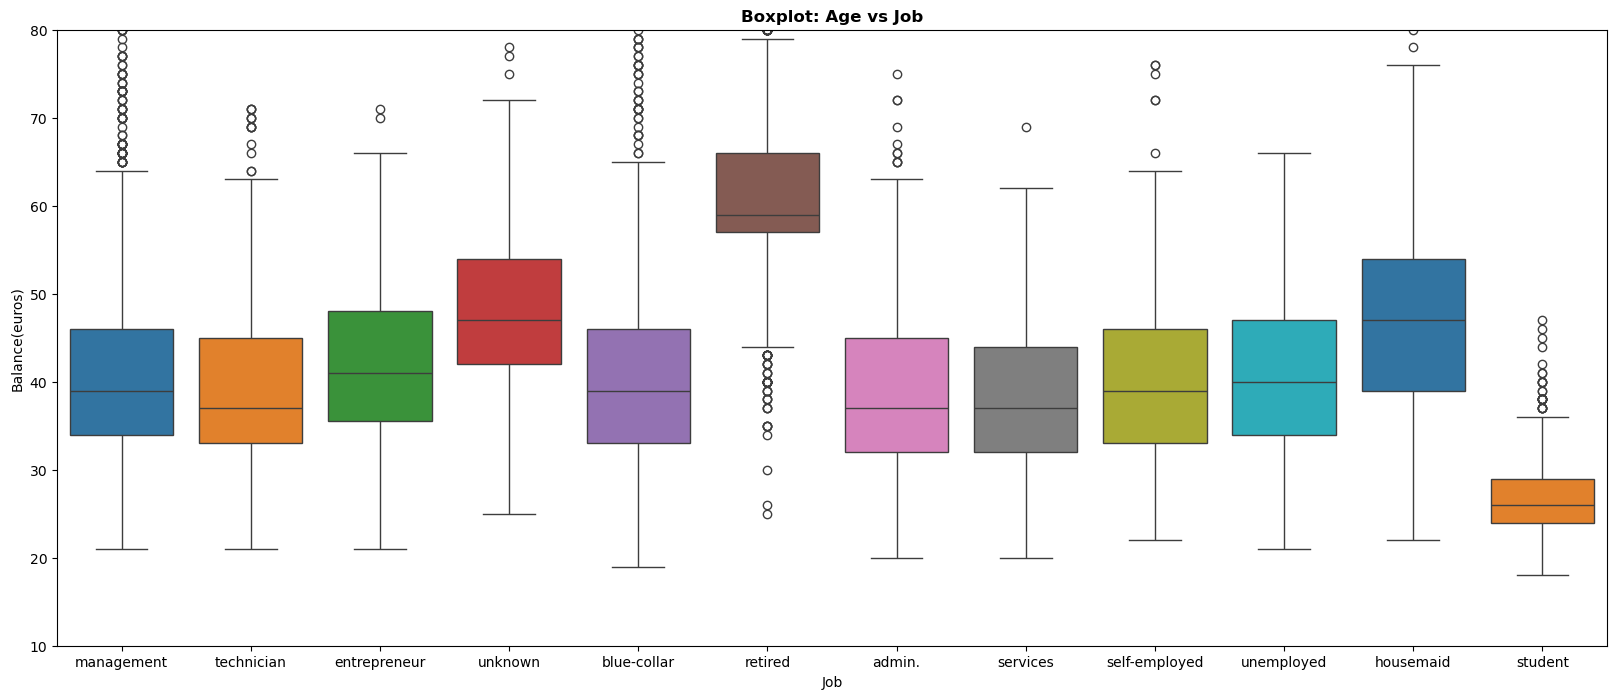

In [75]:
# visualizacion de boxplot de Age vs Job
plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=bankdata_clean, x='Job', y='Age', palette = "tab10")
plt.ylim(10, 80)
plt.title("Boxplot: Age vs Job",fontweight='bold')
plt.xlabel("Job")
plt.ylabel("Balance(euros)")

**Observaciones:** Se puede observar que la edad mínima de los clientes en cada Job es muy similar a excepción del Job = retired. Siendo esta una relación lógica ya que el Job = retired hace referencia al fin de la vida laboral "formal" de un cliente. 
Por otro lado, la edad máxima y mediana en cada Job es bastante dispareja, y particularmente hay una que es bastante menor al resto, que es cuando Job = student. Otra vez, esta relación es coherente ya que las personas dejan de ser estudiantes a una edad más temprana comparado con la edad en la que siguen o dejan de trabajar.

C:\Users\GMA207\AppData\Local\Temp\ipykernel_12872\3213879388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=bankdata_clean, x='Education', y='Balance (euros)', palette = "tab10")


Text(0, 0.5, 'Balance(euros)')

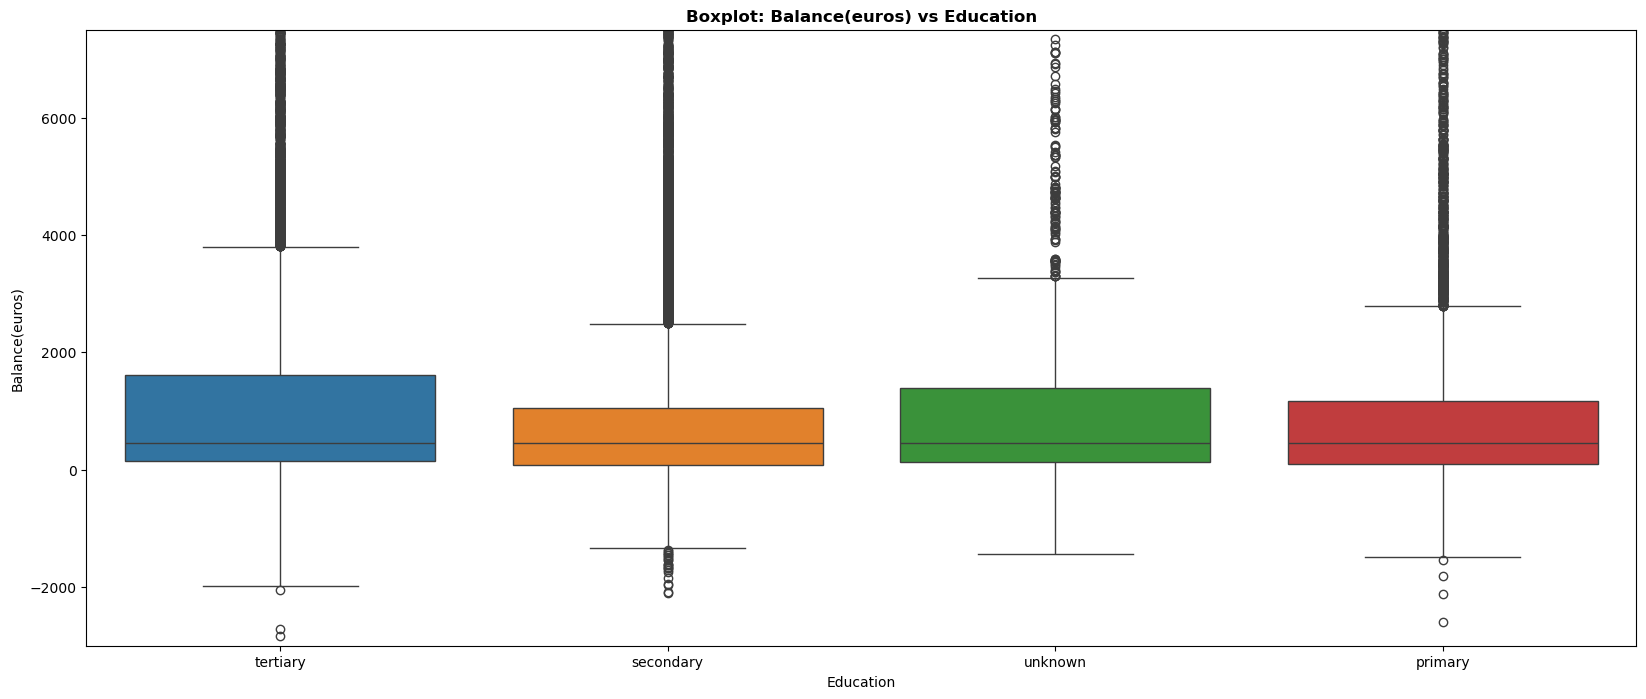

In [74]:
# visualizacion de boxplot de Balance (euros) vs Education
plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=bankdata_clean, x='Education', y='Balance (euros)', palette = "tab10")
plt.ylim(-3000, 7500)
plt.title("Boxplot: Balance(euros) vs Education",fontweight='bold')
plt.xlabel("Education")
plt.ylabel("Balance(euros)")

**Observaciones:** Se puede observar que la mediana del promedio del saldo anual en cuenta de los clientes es muy similar en todos los niveles de educación. Aun así, particularmente el máximo nivel de estudios presente en el dataset (tertiary) es el que contiene una mayor cantidad de clientes en los cuartiles 3 y 4 con mayor saldo promedio anual.
Por otro lado, en los boxplots de cada clase de Education parece haber varios outliers sobre el cuarto cuartil, si embargo, consideramos que esta puede tomarse como una variación natural de los datos ya que tener un determinado nivel de estudios no necesariamente implicaría tener un mayor o menor promedio de saldo anual en cuenta.

### Variable Target

Finalmente, veremos como se distribuyen los datos de la variable Subscription, que se buscará predecir mediante el entrenamiento de un modelo de clasificación.

Proporción de usuarios con Subscription = 0: 88.30%


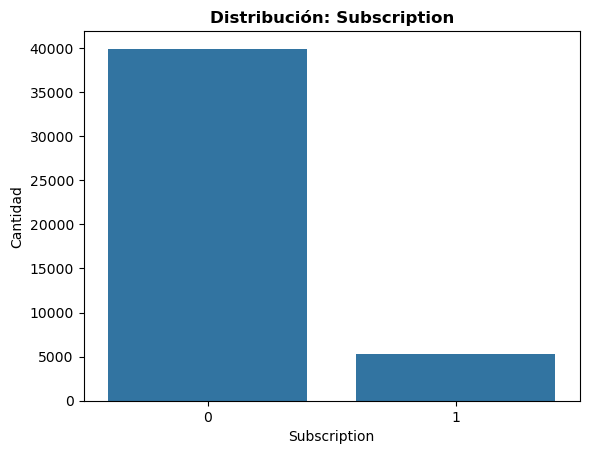

In [177]:
# Se visualiza la distribucion de Subscription
sns.countplot(data=bankdata_clean, x='Subscription')
plt.title("Distribución: Subscription",fontweight='bold')
plt.xlabel("Subscription")
plt.ylabel("Cantidad")

# Proporción de usuarios con Personal Loan = no
prop_subscription_0 = bankdata_clean.loc[bankdata_clean['Subscription'] == 0, 'Subscription'].count() / bankdata['Subscription'].count() * 100
print(f'Proporción de usuarios con Subscription = 0: {prop_subscription_0:.2f}%')

**Observaciones:** el 88.3% de los datos de Subscription tienen un valor de 0. Quiere decir que el dataset presenta muy pocos registros con Subscription = 1, y esto puede afectar negativamente a la busqueda de un buen clasificador de dicha clase en particular, porque un modelo cuya predicción sea siempre Subscription = 0, tenderá a ser muy bueno a pesar de no detectar de forma acertada a los Subscription = 1.